In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import caffe
import sys


In [2]:
sys.path.append('../PublicFunctions/')
import NNDenoise
import ReadFromCavaderData

In [4]:
caffe.set_device(0)
caffe.set_mode_gpu()

# read all the nets
baseTrainingDir = './SampleTrain/trainedNets/'
nets = list()
for i in range(0,4):
    curNet = caffe.Net(os.path.join(baseTrainingDir, str(i), 'DnCNN_Test.prototxt'), 
                      os.path.join(baseTrainingDir, str(i), 'DnCNN.caffemodel'), caffe.TEST)
    nets.append(curNet)

In [10]:
# load images
imgh = ReadFromCavaderData.ReadFromLowdoseChallengeData(3, True, [284])[0]
imgl = ReadFromCavaderData.ReadFromLowdoseChallengeData(3, False, [284])[0]


In [11]:
imgs = NNDenoise.SeqPatchDenoiseParallel(nets, imgl, imgl)
imgs.append(imgl)
imgs.append(imgh)

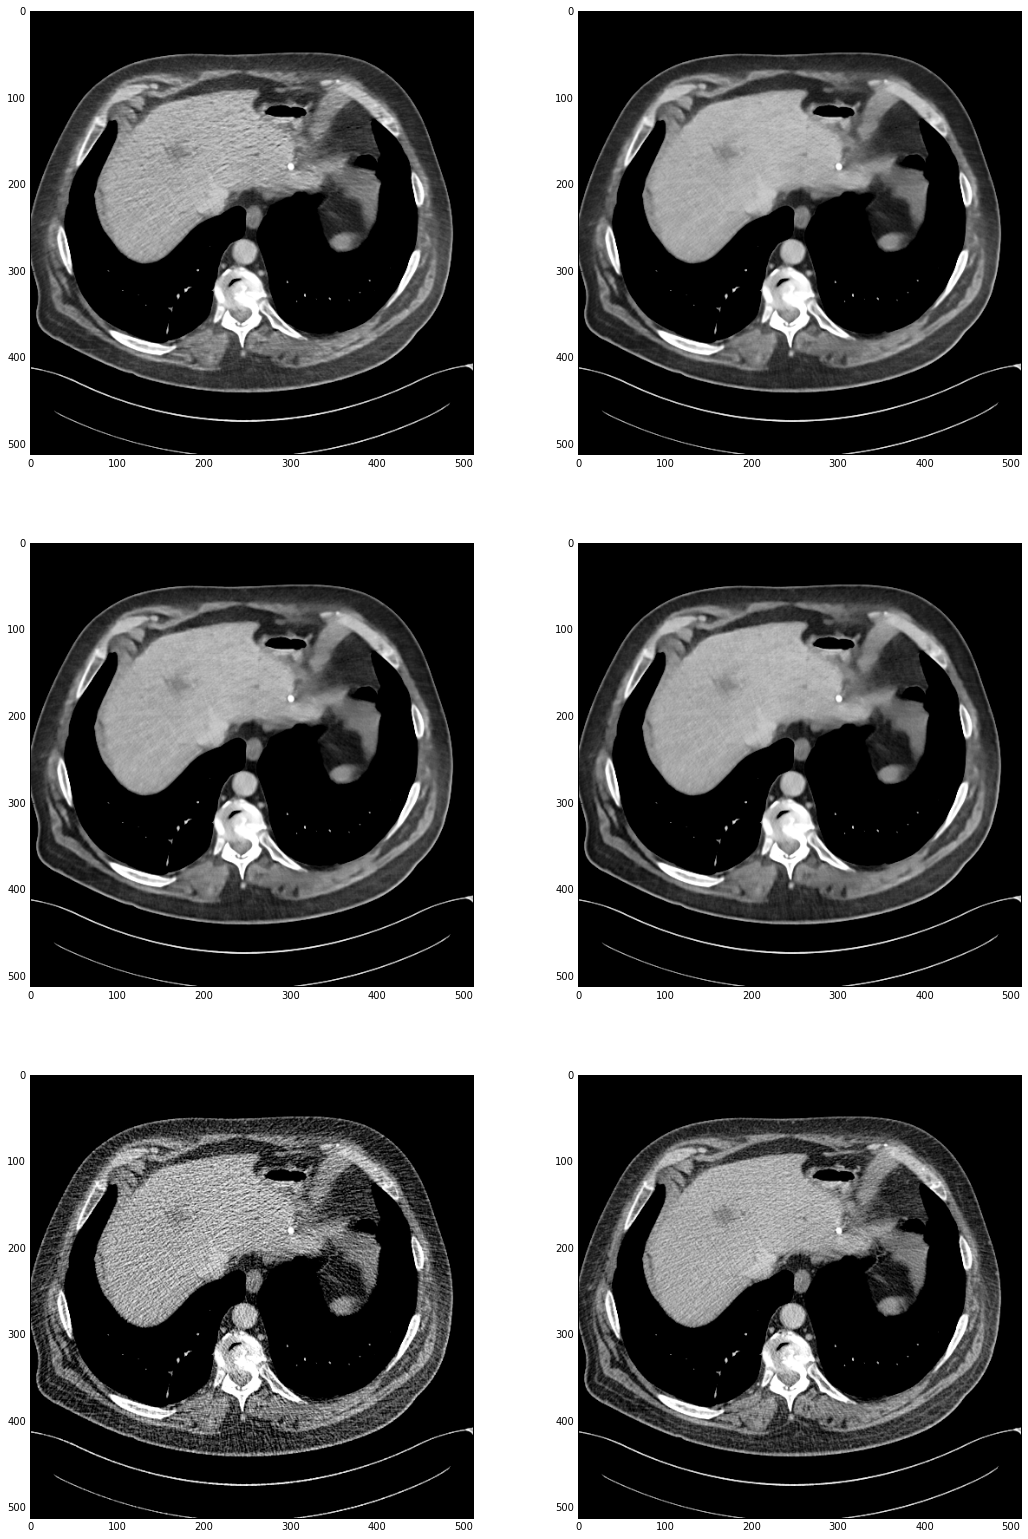

In [12]:
plt.figure(figsize=[18, 27])
for i in range(0,6):
    plt.subplot(3,2,i+1)
    plt.imshow(imgs[i], 'Greys_r', vmin=1024-160, vmax=1024+240)